Build a small DNN architecture and train the model using a random Image Classification
Dataset

Loading dataset and Preprocessing it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


In [ ]:
X_train /= 255
X_test /= 255

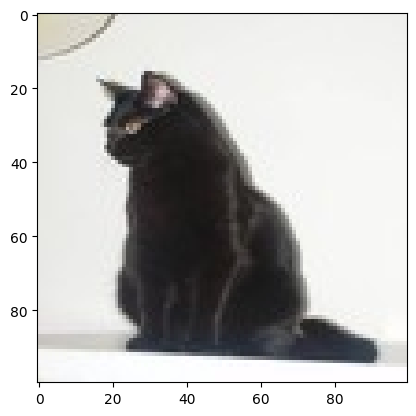

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])

Building Model

In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size = 64)


Epoch 1/5
32/32 [==============================] - 23s 709ms/step - loss: 0.2465 - accuracy: 0.9030
Epoch 2/5
32/32 [==============================] - 21s 651ms/step - loss: 0.2038 - accuracy: 0.9220
Epoch 3/5
32/32 [==============================] - 23s 734ms/step - loss: 0.1521 - accuracy: 0.9520
Epoch 4/5
32/32 [==============================] - 27s 852ms/step - loss: 0.1120 - accuracy: 0.9720
Epoch 5/5
32/32 [==============================] - 23s 730ms/step - loss: 0.0869 - accuracy: 0.9770


In [ ]:
model.evaluate(X_test, y_test)


13/13 [==============================] - 5s 344ms/step - loss: 0.9490 - accuracy: 0.6725


[0.9490213990211487, 0.6725000143051147]

Making Predictions

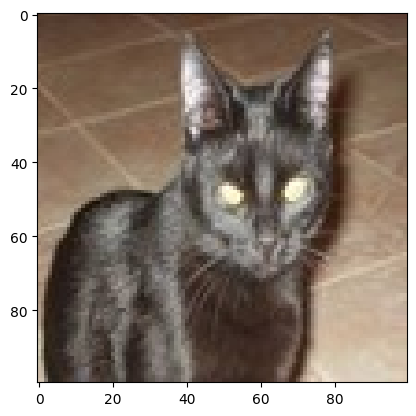

1/1 [==============================] - 0s 29ms/step
It is a cat


In [ ]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
if(y_pred == 0):
  print("It is a dog")
else:
  print("It is a cat")